# Pandas 
<!-- cspell: ignore concat datetime fastparquet fsspec byteorder pytz dateutil setuptools Cython blosc xlsxwriter lxml etree pymysql datareader gcsfs numba numexpr odfpy openpyxl pyarrow pyreadstat pyxlsb sqlalchemy xarray xlrd xlwt zstandard tbody dataframe thead tbody vals -->

## Success Criteria
Today I will be successful if I can ...

* Create `Series` and `DataFrame` using
    * Lists
    * Numpy arrays
    * CSV files
* Use the various methods of a pandas `DataFrame`
* Create new columns in `DataFrame`
* Index and Slice `pandas` objects
* Aggregate data in `DataFrame`s.
* Join multiple `DataFrame`s.

## What is Pandas?
A Python library providing data structures and data analysis tools. The name comes from "panel data"; think about it as a way to visualize and sift through tables of data, similar to R or (heaven forfend) Excel.

* They are built on top of NumPy NdArrays
* http://pandas.pydata.org/pandas-docs/stable/comparison_with_sql.html

### Benefits

* Efficient storage and processing of data.
* Includes many built in functions for data transformation, aggregations, and plotting.
* Great for exploratory work.

### Not so greats

* Does not scale terribly well to large datasets.

## Pandas Documentation:

* http://pandas.pydata.org/pandas-docs/stable/index.html

# Setup

## Importing Libraries

In [ ]:
# By convention import pandas like:
import pandas as pd

# By convention import numpy like:
import numpy as np

# For fake data
from numpy.random import randn

# set random seed to allow for reproducible results
np.random.seed(123)

# import matplotlib & provide inline command for Jupyter
import matplotlib.pyplot as plt
%matplotlib inline

# For stylistic reasons:
plt.style.use('ggplot')

## Confirming Version

Pandas Documentation:

* http://pandas.pydata.org/pandas-docs/stable/index.html

In [ ]:
# show only pandas version
print(pd.__version__)

# more thorough
print(pd.show_versions())

## Options and Settings

Pandas has many options and settings that you can adjust. 

Common settings you may wish to adjust include:

- How many decimal places are displayed
    - (This does not change the precision of the value stored in the DataFrame)
- How many rows or columns are displayed of a large DataFrame


Option and setting documentation for the current version can be found here:

- https://pandas.pydata.org/docs/user_guide/options.html

# Pandas Series

In [ ]:
demo_series = pd.Series([5775, 373, 7, 42, np.nan, 33.9])

print(f"demo_series is: \n{demo_series}")

In [ ]:
# remember...
type(np.nan)

In [ ]:
# demo_series has a shape attribute
print(f"The shape of demo_series is {demo_series.shape}")

## Series containing Strings & mixed types

In [ ]:
# Strings or mixtures of types
# will be stored as dtype: object

world_series = pd.Series(["Cubs",
                          "Royals",
                          "Giants",
                          "Sox",
                          "Giants",
                          "Cards",
                          "Giants",
                          42,
                          None])

world_series

## Series with Informative Indices

In [ ]:
# Instantiate series with 5 random numbers
indexed_series = pd.Series(randn(5), 
                           index = ['California',
                                    'Alabama',
                                    'Indiana',
                                    'Montana',
                                    'Kentucky'])

indexed_series

In [ ]:
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington',
                                        'Alabama',
                                        'Montana',
                                        'Indiana',
                                        'New York'])
alt_indexed_series

## Common indices are aligned for operations

In [ ]:
print(f"indexed_series: \n{indexed_series}\n")

print(f"alt_indexed_series: \n{alt_indexed_series}")

In [ ]:
# Pandas uses the index by default
# to align series for arithmetic
indexed_series + alt_indexed_series

## Pandas Series: Dates as Indices

- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Time and Date Components:
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

In [ ]:
# Be sure to check out the help documentation
# pd.date_range?

In [ ]:
# Datetime index
dt_index = pd.date_range(start='2015-1-1',
                         end='2015-11-1',
                         freq='d')

print(dt_index)
print(dt_index.shape)

In [ ]:
# Datetime index
dt_index = pd.date_range(start='2015-1-1',
                         end='2015-11-1',
                         freq='w')

print(dt_index)
print(dt_index.shape)

In [ ]:
# Datetime index
dt_index = pd.date_range(start='2015-1-1',
                         end='2015-11-1',
                         freq='m')

print(dt_index)
print(dt_index.shape)

## Pandas Series: Dates as indices

In [ ]:
# Datetime index (repeated from previous cell)
# recall: dt_index.shape is (10,)
dt_index = pd.date_range('2015-1-1', '2015-11-1', freq='m')
print(f"dt_index shape: {dt_index.shape}")

# recall: np.random.seed(123)
# note that the number of indices must match
dt_series = pd.Series(randn(10), 
                      index = dt_index)
print(dt_series)
print(f"\ndt_series shape: {dt_series.shape}")

# Pandas DataFrames

- a collection of Pandas Series **that share the same index** 

In [ ]:
# Creating a DataFrame from a two-dimensional list
# Note nested lists are of the same length

pd.DataFrame([[1, 2, 3], 
              [4, 5, 6]], 
             columns=['a', 'b', 'c'],
             index=['foo', 'bar'])

## Create a toy DataFrame

In [ ]:
# recall that we set our random seed earlier
# np.random.seed(123)

dt_index = pd.date_range(start='2015-1-1',
                         end='2015-11-1',
                         freq='m')

toy_df1 = pd.DataFrame(randn(10, 5),
                       index=dt_index,
                       columns=[x for x in 'abcde'])
toy_df1

## Indexing in Pandas

### Selecting columns

To select just one column, use brackets


In [ ]:
# the preferred method
toy_df1['a']

You can also use the "dot notation" for selecting a column

**Note:** 
- Although you may see it in existing code, you may wish to avoid this style of notation.
- This will fail if your column has the same name as a DataFrame method.
- It's also good practice to avoid reserved keywords as headers when possible.

In [ ]:
# an example where dot notation works
toy_df1.a

In [ ]:
# restatement of dt_index from above
dt_index = pd.date_range(start='2015-1-1',
                         end='2015-11-1',
                         freq='m')

# made up column names ... no real purpose here
cols = ['vals', 'amount', 'rank', 'random', 'terms']

toy_df2 = pd.DataFrame(randn(10, 5),
                       index=dt_index,
                       columns=[x for x in cols])
toy_df2.head(3)

In [ ]:
toy_df2['rank']

Note: `pandas.DataFrame.rank` is a method
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

In [ ]:
toy_df2.rank

### Selecting rows

To select one row, use .loc[]

In [ ]:
# loc using index name
toy_df1.loc['2015-10-31']

In [ ]:
# index location
toy_df1.iloc[9]

A single value:

In [ ]:
# Note that the value hasn't changed,
# but the Jupyter display isn't as truncated for single values
# These display settings can be adjusted
toy_df1.loc['2015-10-31', 'a']

## Each Column & Row is a series

In [ ]:
# recall toy_df1
toy_df1

### A row of a DataFrame is a series

In [ ]:
row = toy_df1.loc['2015-01-31']

print(f"row type: {type(row)}\n")

row

### A column of a DataFrame is also a series

In [ ]:
col = toy_df1['d']

print(f"col type: {type(col)}\n")

col

### Each column will share the same indices

In [ ]:
# two columns compared:
# are all of the indices the same?

np.all(col.index == toy_df1['a'].index)

### Each row will share the same indices

In [ ]:
# two rows compared:
# are all of the indices the same?

np.all(row.index == toy_df1.loc['2015-10-31'].index)

## Column and row indices for the DataFrame as a whole

In [ ]:
# to find the row indices
toy_df1.index

In [ ]:
# to find the column indices
toy_df1.columns

# More complex indexing

In [ ]:
# recall toy_df1
print(toy_df1.shape)

toy_df1

## Selecting multiple, individual columns

In [ ]:
# note the double brackets
# a list of column names is being passed
toy_df1[['a','e']]

## Selecting multiple, individual rows

In [ ]:
# note the double brackets
# a list of row names is being passed
toy_df1.loc[['2015-01-31','2015-10-31']]

## Column operations
Just like numpy, operations are broadcast to every element of a column

In [ ]:
# notice the result is returned as a Series
toy_df1['a'] + toy_df1['b']

## Adding a new column
It's just like setting by key in a dictionary

In [ ]:
toy_df1['f'] = abs(toy_df1['a'])**toy_df1['b']

In [ ]:
toy_df1

## Advanced selection


### .loc 
select by row label (index), and column label

In [ ]:
# Ranges by label.
toy_df1.loc['2015-05-31':'2015-08-31', 'c':'e'] 

In [ ]:
# Value Reassignment 
toy_df1.loc['2015-05-31':'2015-08-31', 'c':'e'] = 2.7

In [ ]:
toy_df1

### .iloc
select by __positional__ index

In [ ]:
# ranges by number: [row, column]
# Notice that the range is *not* inclusive
toy_df1.iloc[2:4, 2:5]


      
# Multiple Indices

Start with a df with a single date index

In [ ]:
# recall: np.random.seed(123)

# generate index of 30 months
dt_index = pd.date_range(start='2015-1-1',
                         end='2017-7-1',
                         freq='m')

dt_df = pd.DataFrame(randn(30,5),
                     index=dt_index,
                     columns=[x for x in "abcde"])

dt_df

Let's add new column of states

In [ ]:
dt_df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
dt_df.head()

`reset_index` shifts the index to a column, then gives the rows a boring old positional index

Note that `dt_df.reset_index(inplace=True)` is equivalent to `dt_df = dt_df.reset_index()`

In [ ]:
# changes dt_df inplace
dt_df.reset_index(inplace=True)

In [ ]:
dt_df

`set_index` sets columns to indices

In [ ]:
dt_df = dt_df.set_index(['state', 'index'])
dt_df.head()

In [ ]:
dt_df.loc['Alabama']

In [ ]:
# This one doesn't work
# dt_df.loc['2015-01-31']

In [ ]:
# Can do this. (use both first and second index)
dt_df.loc[('Alabama', '2015-01-31')] 

# Loading data from a local file

In [ ]:
# pd.read_csv?

In [ ]:
golf_df = pd.read_csv('data/playgolf.csv',
                      delimiter=',')

golf_df.head()

In [ ]:
white_wine_df = pd.read_csv('data/winequality-white.csv',
                            delimiter=';')

print(white_wine_df.shape, "\n")

white_wine_df.head()

In [ ]:
red_wine_df = pd.read_csv('data/winequality-red.csv',
                          delimiter=';')
red_wine_df.head()

# Basic DataFrame EDA summaries

In [ ]:
# shape of the DataFrame
red_wine_df.shape

In [ ]:
# column indices
red_wine_df.columns

In [ ]:
# row indices
# this result indicates a default numeric range index
red_wine_df.index

In [ ]:
# Display the first n rows (default is 5)
red_wine_df.head()  

In [ ]:
# Display the final n rows (default is 5)
red_wine_df.tail()

In [ ]:
# pull sample of rows: default is one row
red_wine_df.sample(5)

# question for later: with replacement?

In [ ]:
# info is incredibly useful for discovering null values
# and for gaining clues as to how they may be stored

# this particular df seems to have all values present
red_wine_df.info()

In [ ]:
# describe provides very basic statistical information
red_wine_df.describe()

# Filtering with conditionals

Also referred to: 
- row selecting
- Boolean indexing
- Boolean masking

## Boolean masks
- Creating a Boolean mask
- Indexing with a Boolean mask

In [ ]:
# consider the values in the 'chlorides' column
red_wine_df['chlorides']

In [ ]:
# Which rows are at 0.08 or less?
red_wine_df['chlorides'] <= 0.08

In [ ]:
# Save those results
mask = red_wine_df['chlorides'] <= 0.08 

# This mask is stored as a Series of booleans
print(type(mask),"\n")

mask.head()

You can use a boolean series to "mask" a DataFrame / series, returning only those rows where the mask is `True`

In [ ]:
# notice the indices and the 'chlorides' values
red_wine_df[mask].head()

In Pandas, the tilde `~` character (next to the number 1) negates booleans (switching `true` and `false`) and is useful when you need the complement. 

In this case, rows for which the masked values are `false` are returned.

In [ ]:
# using the tilde to get the compliment
# again, notice the indices and the 'chlorides' values
red_wine_df[~mask].head()

## Combining conditionals

In [ ]:
# using | for OR

# results under a very low value, or over a very high value
red_wine_df[(red_wine_df['chlorides'] < 0.02) | (red_wine_df['chlorides'] > 0.6)]

In [ ]:
# using & for AND

# results between 0.04 and 0.08 (exclusive)
red_wine_df[(red_wine_df['chlorides'] > 0.04) & (red_wine_df['chlorides'] < 0.08)]

In [ ]:
# note:
# - backslash for line continuation
# - the column indexing
red_wine_df2 = red_wine_df[(red_wine_df['chlorides'] >= 0.04) & \
                           (red_wine_df['chlorides'] < 0.08)][['pH','fixed acidity']]

# note the reduction to two columns
red_wine_df2.shape

In [ ]:
red_wine_df2.head()

### Reset Index

Note that resetting the index defaults to keeping the original index values and places them in a new 'index' column

In [ ]:
# sort records ascending by `pH` and reset the index
red_wine_df2.sort_values('pH').reset_index().head()

The `reset_index` method offers several parameters, including `drop` and `inplace`.
- `drop` removes the previous index.
- `inplace` changes the original Series instead of returning a new one.

In [ ]:
# pd.Series.reset_index?

In [ ]:
# sort records ascending by `pH` and reset the index (dropping the original)
red_wine_df2.sort_values('pH').reset_index(drop=True).head()

Note that `red_wine_df2` hasn't changed as none of the operations were executed `inplace` and the values were not stored.

In [ ]:
red_wine_df2.head()

# Groupby

In [ ]:
red_wine_df.head()

In [ ]:
# Note that this returns back to us a groupby object.
# It doesn't actually return anything useful
# until you perform some aggregation on it.

rw_gb_quality = red_wine_df.groupby('quality')

rw_gb_quality

In [ ]:
rw_gb_quality.max()

In [ ]:
rw_gb_quality.max()['density']

In [ ]:
# Note we can also group by multiple columns by passing them in in a list. It will group by 
# the first column passed in first, and then the second after that (i.e., it will group by 
# the second within the group by of the first). 
red_wine_df3 = red_wine_df.groupby(['pH', 'quality']).count()

red_wine_df3.head(20)

# Remove columns

In [ ]:
# add a computed column name it something new

red_wine_df['free sulfur dioxide'] / red_wine_df['total sulfur dioxide']

In [ ]:
red_wine_df['pct_free_sulf'] = red_wine_df['free sulfur dioxide'] / red_wine_df['total sulfur dioxide']

In [ ]:
red_wine_df.head()

In [ ]:
# Dropping a row
red_wine_df.drop(0,
                 axis=0,
                 inplace=False)

In [ ]:
# This will fail as it needs an axis entry
# red_wine_df.drop('pct_free_sulf')

In [ ]:
red_wine_df.drop('pct_free_sulf',
                 axis=1).head()

In [ ]:
red_wine_df.columns

# Managing Missing Values
* http://pandas.pydata.org/pandas-docs/stable/missing_data.html

In [ ]:
miss_val_df = pd.DataFrame(
    [[1, 2, 3], [4, np.nan, 6]],
    columns=['a', 'b', 'c'],
    index=['foo', 'bar'])
miss_val_df

In [ ]:
miss_val_df.fillna(0)

In [ ]:
miss_val_df

In [ ]:
# IF YOU WANT THE CHANGE TO HAPPEN INPLACE YOU MUST SPECIFY:
miss_val_df.fillna(0,inplace=True)
miss_val_df

In [ ]:
miss_val_df['b']['foo'] = np.nan

In [ ]:
miss_val_df

In [ ]:
miss_val_df.dropna(axis = 1)

In [ ]:
miss_val_df.dropna(axis = 0)

# Merge 
* http://pandas.pydata.org/pandas-docs/stable/merging.html

We can join DataFrames in a similar way that we join tables to SQL.  In fact, left, right, outer, and inner joins work the same way here.



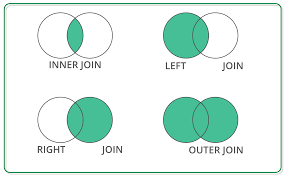

In [ ]:
merge1 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['a', 'b', 'c'])

merge2 = pd.DataFrame(
    [[1, 2, 3], [4, 3, 6]], 
    columns=['z', 'b', 'y'])

print("merge1 = \n{}\n\nmerge2=\n{}\n".format(merge1, merge2))

In [ ]:
merged_df = merge1.merge(merge2, how='outer')

In [ ]:
merged_df

# Concatenating
* adding *rows*
* see also: df.append()

In [ ]:
df1 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col3': range(5)})
df2 = pd.DataFrame(
    {'Col1': range(5), 'Col2': range(5), 'Col4': range(5)},
    index=range(5, 10))

In [ ]:
df1

In [ ]:
df2

In [ ]:
#Vertically
pd.concat([df1, df2], axis=0, sort=False)

In [ ]:
pd.concat([df1, df2], join='outer', axis=1)

# Categorical data

In [ ]:
golf_df = pd.read_csv('data/playgolf.csv', delimiter=',' )
golf_df.head()

df.value_counts() gets you the frequencies

In [ ]:
golf_df['Outlook'].value_counts()

Using apply will get you the value counts for multiple columns at once

In [ ]:
golf_df[['Outlook','Result']].head(2)

In [ ]:
golf_df[['Outlook','Result']].apply(lambda x: x.value_counts())

Contingency Tables for looking at bivariate relationships between two categorical variables

In [ ]:
pd.crosstab(golf_df['Outlook'], golf_df['Result'])

Often we want the row percentages

In [ ]:
pd.crosstab(golf_df['Outlook'], golf_df['Result']).apply(lambda r: r/r.sum(), axis=1)

Or the column percentages

In [ ]:
pd.crosstab(golf_df['Outlook'],
            golf_df['Result']).apply(lambda c: c/c.sum(), axis=0)

# Plotting DataFrames

In [ ]:
# reset golf to default import
golf_df = pd.read_csv('data/playgolf.csv',
                 delimiter=',' )
golf_df.head()

In [ ]:
golf_df.hist(['Temperature','Humidity'],bins=5);

In [ ]:
golf_df[['Temperature','Humidity']].plot(kind='box');

In [ ]:
golf_df.plot('Temperature', 'Humidity', kind='scatter');

In [ ]:
groups=golf_df.groupby('Outlook')
print(groups)
for stuff in groups:
    print(stuff)

In [ ]:
for name, group in groups:
    print(type(group))

In [ ]:
for name, group in groups:
    print(name)

In [ ]:
fig, ax = plt.subplots(figsize = (8,6))

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity,\
            marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

In [ ]:
golf_df.head()

In [ ]:
golf_df['Outlook'].value_counts()

In [ ]:
golf_df['Windy'].value_counts()

In [ ]:
g = golf_df.groupby(['Outlook', 'Windy'])

In [ ]:
g.max()

In [ ]:
g.agg(max) 


In [ ]:
golf_df_th = g.agg(max)[['Temperature','Humidity']]
golf_df_th

In [ ]:
golf_df_th.unstack()

In [ ]:
golf_df_th.unstack()['Temperature']

In [ ]:
golf_df_th.reset_index()

In [ ]:
golf_df

# Pandas is built on Numpy

## Numpy Review

* Numpy is one of the fundamental packages for scientific computing in Python.


## Numpy Arrays
* Or NdArrays (n-dimensional array)
* They are like lists in Python however they allow faster computation
    1. They are stored as one contiguous block of memory, rather than being spread out across multiple locations like a list. 
    2. Each item in a numpy array is of the same data type (i.e. all integers, all floats, etc.), rather than a conglomerate of any number of data types (as a list is). We call this idea homogeneity, as opposed to the possible heterogeneity of Python lists.


Lets do a quick review


In [ ]:
# Create a 1 dimensional numpy array with values 1 through 20


In [ ]:
# Extract all odd numbers from array above


In [ ]:
# Replace all odd numbers in array above
# with value "-1" and save this to a new array variable
# without replacing any values in the original array


In [ ]:
# Convert a 1D array to a 2D array with 2 rows (you can use array above or a new array)


In [ ]:
#Get all of the items between 5 and 10 from the array below

a = np.array([2,6,1,9,10,3,27])


In [ ]:
#Reverse the columns of the 2D array shown below

b = np.arange(9).reshape(3,3)


In [ ]:
#create a 2D array of shape 5x3 to contain random decimal values between 5 and 10


## Series methods

In [ ]:
round(dt_series.mean(), 2)

# Other Notes

In [ ]:
a_gt0_filter = (toy_df1['a'] > 0)

# These two work identically
toy_df1[a_gt0_filter]
toy_df1.loc[a_gt0_filter]

# This fails:
# toy_df1[a_gt0_filter, "b"]

# This works
toy_df1.loc[a_gt0_filter, "b"]

# This also works
toy_df1.loc[a_gt0_filter, "b":"d"]